In [1]:
import os
import matplotlib.pyplot as plt
import torch
from pytao import Tao
from bmadx.plot import plot_projections
from bmadx.coordinates import save_as_h5
from bmadx.beam_generator import create_beam
from phase_space_reconstruction.virtual.beamlines import quad_tdc_bend

In [2]:
# create synthetic ground truth beam from base and transform yaml files
data_dir = 'data'
gt_beam = create_beam(base_yaml = os.path.join(data_dir,'base.yaml'),
                      transforms_yaml = os.path.join(data_dir,'transforms.yaml'), 
                      p0c = 43.36e6,
                      save_as = os.path.join('data', 'gt_beam.pt'))

ground truth distribution saved at data/gt_beam.pt


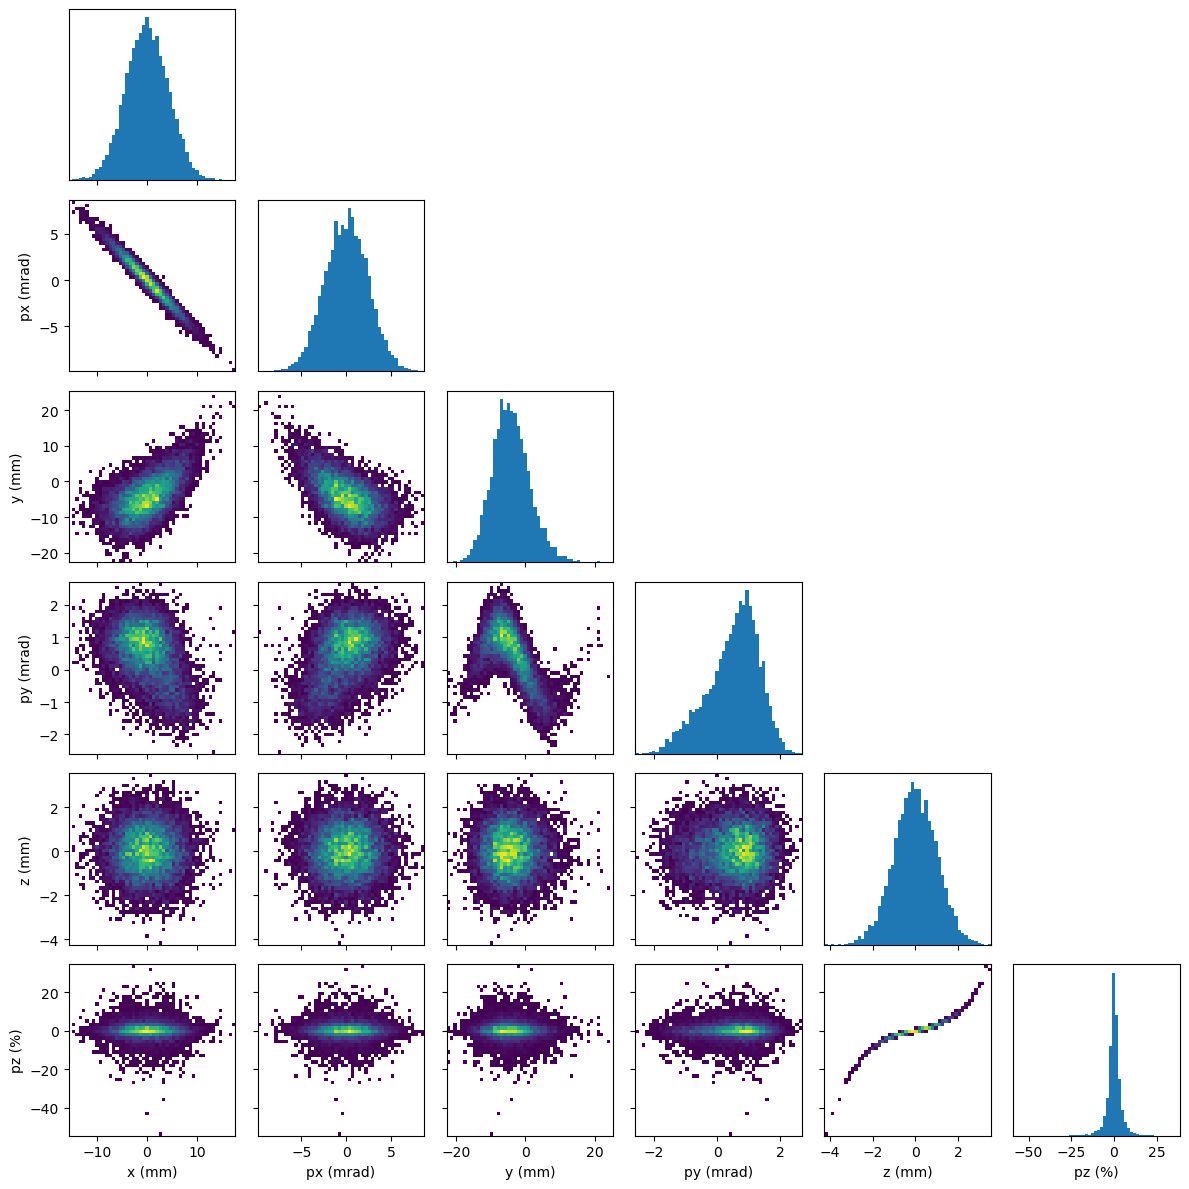

In [3]:
fig, ax = plot_projections(gt_beam.numpy_particles())
plt.show()

In [4]:
save_as_h5(gt_beam.numpy_particles(), 'pmd_beam.h5')

In [5]:
tao = Tao('-init tao.init -noplot')
tao.cmd('set global track_type = beam')
x_ini = tao.bunch1('beginning', 'x')
px_ini = tao.bunch1('beginning', 'px')
y_ini = tao.bunch1('beginning', 'y')
py_ini = tao.bunch1('beginning', 'py')
z_ini = tao.bunch1('beginning', 'z')
pz_ini = tao.bunch1('beginning', 'pz')


In [6]:
x_end = tao.bunch1('end', 'x')
px_end = tao.bunch1('end', 'px')
y_end = tao.bunch1('end', 'y')
py_end = tao.bunch1('end', 'py')
z_end = tao.bunch1('end', 'z')
pz_end = tao.bunch1('end', 'pz')
stats = tao.bunch_params('end')
stats

{'beta_x': 1.23173765371829,
 'alpha_x': -1.28064951990191,
 'gamma_x': 2.14336485115588,
 'phi_x': 0.0,
 'eta_x': 0.0728532116007885,
 'etap_x': 0.0890294044937127,
 'sigma_x': 0.00171326886149137,
 'sigma_p_x': 0.0022600313578888,
 'emit_x': 2.38304819447151e-06,
 'norm_emit_x': 0.000206844265574487,
 'beta_y': 8.49699550231561,
 'alpha_y': -3.38063663071898,
 'gamma_y': 1.46271750121227,
 'phi_y': 0.0,
 'eta_y': 0.0836764623152962,
 'etap_y': 0.0938935157567055,
 'sigma_y': 0.00945692800920079,
 'sigma_p_y': 0.00392371647158042,
 'emit_y': 1.05253071331901e-05,
 'norm_emit_y': 0.000913577588972526,
 'beta_z': 0.0271325987087658,
 'alpha_z': 1.0295469233405,
 'gamma_z': 75.9222103813584,
 'phi_z': 0.0,
 'eta_z': 0.0,
 'etap_z': 0.0,
 'sigma_z': 0.000996161250343939,
 'sigma_p_z': 0.0526948739592493,
 'emit_z': 3.6573615647299e-05,
 'norm_emit_z': 0.00317452357259054,
 'beta_a': 0.797177199352671,
 'alpha_a': -0.553784642698898,
 'gamma_a': 0.867517167170913,
 'phi_a': 0.0,
 'eta_a': 

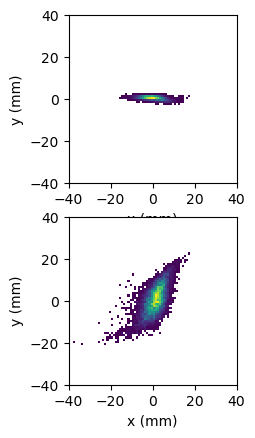

In [7]:
fig, ax = plt.subplots(2,1)
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax[0].hist2d(x=1000*x_ini, y=1000*py_ini,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax[0].set_xlabel('x (mm)')
ax[0].set_ylabel('y (mm)')
ax[0].set_aspect('equal')
ax[1].hist2d(x=1000*x_end, y=1000*py_end,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax[1].set_xlabel('x (mm)')
ax[1].set_ylabel('y (mm)')
ax[1].set_aspect('equal')
plt.show()

In [8]:
# diagnostic beamline:
p0c = 43.36e6
lattice = quad_tdc_bend(p0c, dipole_on=True)
lattice.elements[0].K1.data = torch.tensor(0)
lattice.elements[2].VOLTAGE.data = torch.tensor(1e7)
lattice.elements[4].G.data = torch.tensor(0.2)
beam_out = lattice(gt_beam.detach_clone())

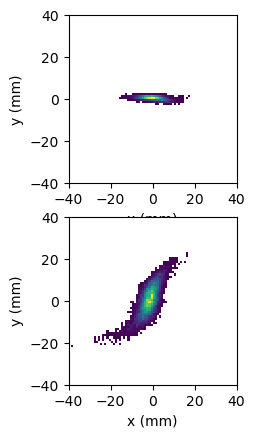

In [9]:
fig, ax = plt.subplots(2,1)
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax[0].hist2d(x=1000*gt_beam.x, y=1000*gt_beam.py,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax[0].set_xlabel('x (mm)')
ax[0].set_ylabel('y (mm)')
ax[0].set_aspect('equal')
ax[1].hist2d(x=1000*beam_out.x, y=1000*beam_out.py,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax[1].set_xlabel('x (mm)')
ax[1].set_ylabel('y (mm)')
ax[1].set_aspect('equal')
plt.show()